In [2]:
import pandas as pd
from transformers import pipeline
import torch
import time

# Check for MPS backend availability on Apple Silicon or fallback to CPU
device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")
print(f"Using device: {device}")

# Load the YouTube comments dataset
file_path = "/content/cleaned_ABARTH_uk_comments (2).csv"
youtube_data = pd.read_csv(file_path)

# Load the pre-trained sentiment-analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment", device=device)

# Function to split text into chunks of maximum length 512
def chunk_text(text, max_length=512):
    return [text[i:i + max_length] for i in range(0, len(text), max_length)]

# Function to apply sentiment analysis on text chunks and aggregate results
def analyze_sentiment(text):
    try:
        chunks = chunk_text(text, max_length=512)
        sentiments = [sentiment_pipeline(chunk)[0]['label'] for chunk in chunks]
        return max(set(sentiments), key=sentiments.count)  # Aggregate by taking the majority sentiment
    except Exception as e:
        print(f"Error processing text: {text}\nError: {e}")
        return None

# Progress tracking setup
total_comments = len(youtube_data)
start_time = time.time()

# Apply sentiment analysis to each comment and track progress
sentiments = []
for idx, comment in enumerate(youtube_data['cleaned_comment_with_text_emojis']):  # Replace 'comment_column' with actual column name
    sentiment = analyze_sentiment(str(comment))
    sentiments.append(sentiment)
    if (idx + 1) % 10 == 0:
        elapsed_time = time.time() - start_time
        print(f"Processed {idx + 1}/{total_comments} comments. Elapsed time: {elapsed_time:.2f} seconds.")

# Add sentiment analysis results to the dataframe
youtube_data['sentiment'] = sentiments

# Output the first few rows to check results
print(youtube_data.head())

# Save the analyzed data to a new CSV file
output_file_path = 'analyzed_youtube_comments.csv'
youtube_data.to_csv(output_file_path, index=False)

print(f"Sentiment analysis complete. Results saved to {output_file_path}.")



Using device: cpu
Processed 10/584 comments. Elapsed time: 461.19 seconds.
Processed 20/584 comments. Elapsed time: 556.91 seconds.
Processed 30/584 comments. Elapsed time: 734.36 seconds.
Processed 40/584 comments. Elapsed time: 963.28 seconds.
Processed 50/584 comments. Elapsed time: 1001.54 seconds.
Processed 60/584 comments. Elapsed time: 1048.22 seconds.
Processed 70/584 comments. Elapsed time: 1101.80 seconds.
Processed 80/584 comments. Elapsed time: 1129.49 seconds.
Processed 90/584 comments. Elapsed time: 1136.18 seconds.
Processed 100/584 comments. Elapsed time: 1176.84 seconds.
Processed 110/584 comments. Elapsed time: 1209.12 seconds.
Processed 120/584 comments. Elapsed time: 1220.51 seconds.
Processed 130/584 comments. Elapsed time: 1227.56 seconds.
Processed 140/584 comments. Elapsed time: 1241.24 seconds.
Processed 150/584 comments. Elapsed time: 1294.67 seconds.
Processed 160/584 comments. Elapsed time: 1301.19 seconds.
Processed 170/584 comments. Elapsed time: 1316.71 s

<ipython-input-5-8805752ae809>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')


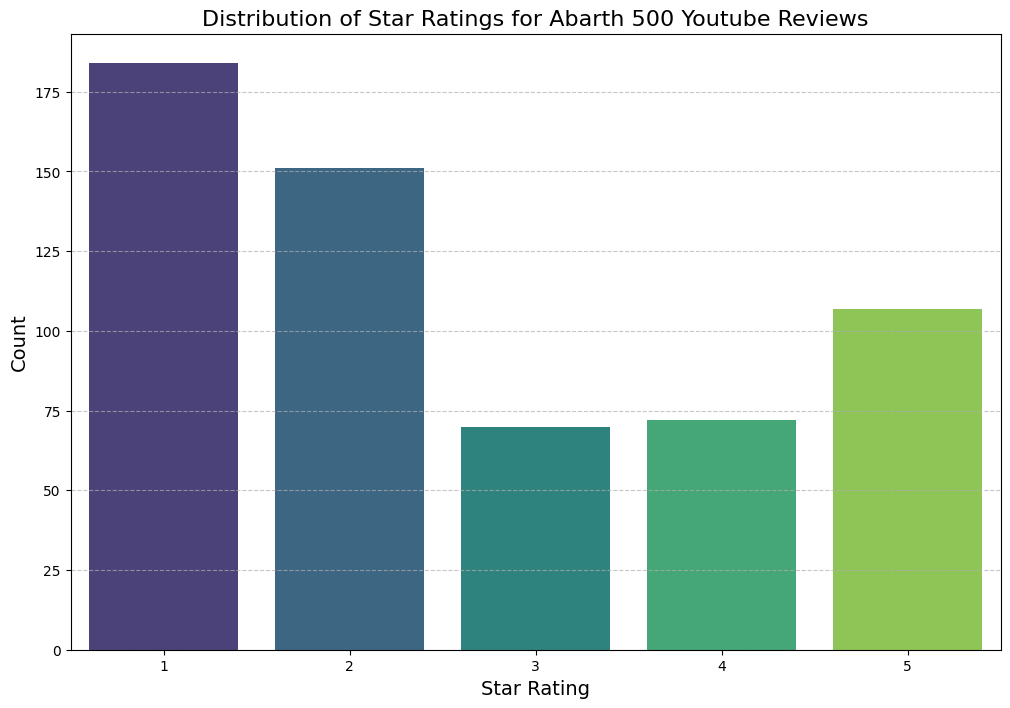

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the sentiment analyzed data
file_path =  "/content/analyzed_youtube_comments.csv"
abarth_data = pd.read_csv(file_path)

# Extract the star ratings from the sentiment labels
abarth_data['star_rating'] = abarth_data['sentiment'].apply(lambda x: int(x.split()[0]) if 'star' in x else None)

# Count the occurrences of each star rating
rating_counts = abarth_data['star_rating'].value_counts().sort_index(ascending=False)

# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')

# Set plot details
plt.title('Distribution of Star Ratings for Abarth 500 Youtube Reviews', fontsize=16)
plt.xlabel('Star Rating', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save and display the plot
plt.savefig('star_rating_distribution_with_text_emojis_Abarth_Youtube.png', dpi=300)
plt.show()

<ipython-input-6-bb1ff51ce880>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


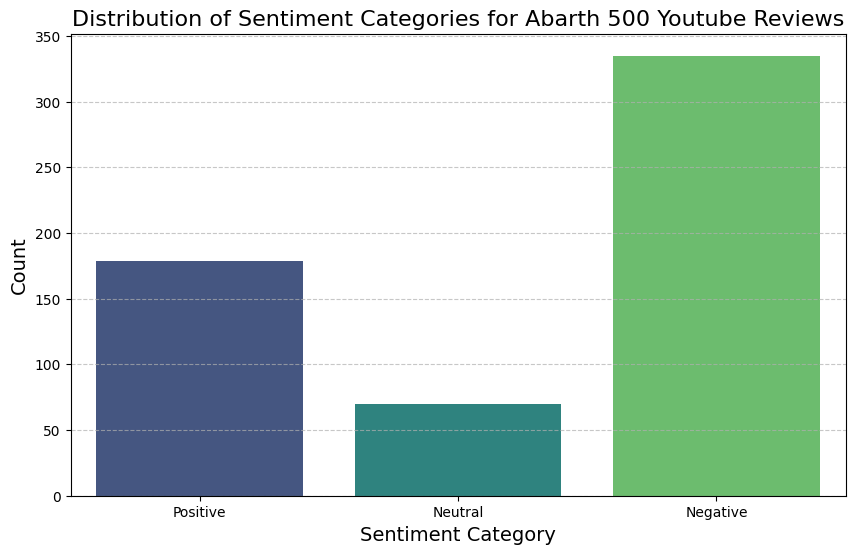

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the sentiment analyzed data
file_path = "/content/analyzed_youtube_comments.csv"
abarth_data = pd.read_csv(file_path)

# Validate and extract star ratings
def extract_star_rating(sentiment):
    try:
        if 'star' in sentiment:
            return int(sentiment.split()[0])
    except Exception as e:
        print(f"Error extracting star from sentiment '{sentiment}': {e}")
    return None

abarth_data['star_rating'] = abarth_data['sentiment'].apply(extract_star_rating)

# Function to map star ratings to sentiment categories
def star_to_sentiment(star_rating):
    if star_rating in [4, 5]:
        return 'Positive'
    elif star_rating == 3:
        return 'Neutral'
    elif star_rating in [1, 2]:
        return 'Negative'
    return None

abarth_data['sentiment_category'] = abarth_data['star_rating'].apply(star_to_sentiment)

# Count the occurrences of each sentiment category
sentiment_counts = abarth_data['sentiment_category'].value_counts().reindex(['Positive', 'Neutral', 'Negative'], fill_value=0)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')

# Set plot details
plt.title('Distribution of Sentiment Categories for Abarth 500 Youtube Reviews', fontsize=16)
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save and display the plot
plt.savefig('sentiment_category_distribution_abarth_Youtube.png', dpi=300)
plt.show()


In [10]:
# Convert 'publish_date' to datetime, accounting for 'Z' in the format
abarth_data['year'] = pd.to_datetime(abarth_data['publish_date'], format='%Y-%m-%dT%H:%M:%S%z').dt.year



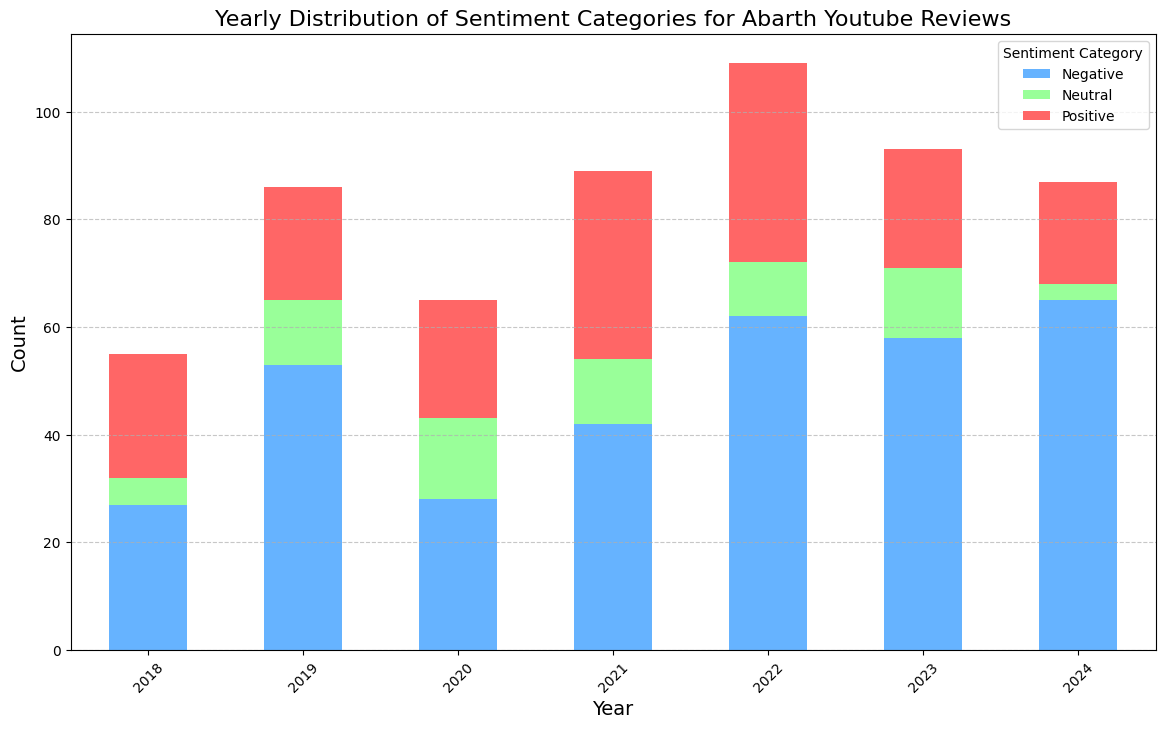

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the sentiment analyzed data
file_path = "/content/analyzed_youtube_comments.csv"
abarth_data = pd.read_csv(file_path)

# Extract the star ratings from the sentiment labels
abarth_data['star_rating'] = abarth_data['sentiment'].apply(lambda x: int(x.split()[0]) if 'star' in x else None)

# Convert star ratings to sentiment categories
def star_to_sentiment(star_rating):
    if star_rating in [4, 5]:
        return 'Positive'
    elif star_rating == 3:
        return 'Neutral'
    elif star_rating in [1, 2]:
        return 'Negative'
    else:
        return None

abarth_data['sentiment_category'] = abarth_data['star_rating'].apply(star_to_sentiment)

# Ensure 'publish_date' column exists and convert it to datetime
if 'publish_date' in abarth_data.columns:
    abarth_data['year'] = pd.to_datetime(abarth_data['publish_date'], format='%Y-%m-%dT%H:%M:%S%z').dt.year
else:
    raise ValueError("publish_date column not found in the dataset")

# Group the data by year and sentiment category, then count occurrences
sentiment_by_year = abarth_data.groupby(['year', 'sentiment_category']).size().unstack(fill_value=0)

# Plot the results as a stacked bar chart
colors = ['#66b3ff', '#99ff99', '#ff6666']  # Blue, green, and red for sentiment categories
sentiment_by_year.plot(kind='bar', stacked=True, figsize=(14, 8), color=colors)

# Set plot details
plt.title('Yearly Distribution of Sentiment Categories for Abarth Youtube Reviews', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Sentiment Category')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save and display the plot
plt.savefig('sentiment_category_distribution_by_year_Abarth_Youtube.png', dpi=300)
plt.show()
